In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from matplotlib.ticker import LogFormatter 
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3





m_1 = 6
m_2 = 8

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(10)

for i in range(len(y_list)):
    y_list[i]= (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 = ", m_1_list)

f = np.geomspace(1e-4, 1, 10)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_min = 5
m_max = 100


X_min = 1e-5
X_max = 1e5

m_1 =  [6, 8, 11, 15, 19, 26, 34, 45, 60, 80]


Merger_PWR_Huang_paper = [1.79943660e-01 1.39217432e+00 1.07162575e+01 7.95909044e+01
 5.02263359e+02 2.46629913e+03 1.09109867e+04 4.73955968e+04
 2.05369219e+05 8.89595874e+05]


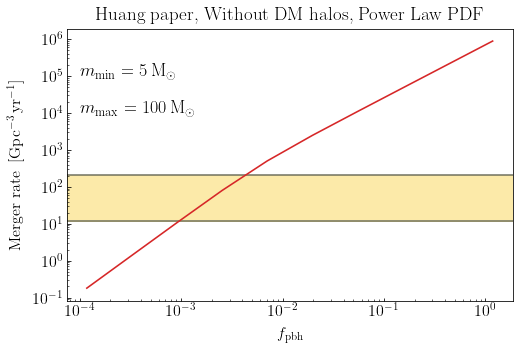

In [2]:
# Plot of merger vs f_pbh as per Huang Paper to calculate f_pbh at R_12 = 100  Gpc⁻3 yr⁻1.

# merger rate for Δ_1=Δ_2=Δ.
def Merger_equal_deltas(m_1, m_2, t_m):
   
        return 3.9e6 * (f**2) *((t_m/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * min((P(m_1))/m_1, (P(m_2))/m_2) * ((P(m_1))/m_1 + (P(m_2))/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
    
    

# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_PWR = np.zeros((10, 10))
merge_PWR = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    merger_sum = 0
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        merger_individual = 0
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
            
            f = f_pbh * 0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR[i,j] = 0.5 * Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
            else:
                Merger_PWR[i,j] =  Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
            
            if m_1 > m_2:
                merger_individual = merger_individual +  Merger_PWR[i,j]
            else:
                merger_individual = 0
            
            merger_sum = merger_sum + merger_individual
    
            merge_PWR[z]  = merger_sum

print("Merger_PWR_Huang_paper =", merge_PWR)        
        
plt.figure(figsize = (8, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.axhline(y = 12, color = '#6E705E')
plt.axhline(y = 213, color = '#6E705E')
plt.axhspan(12, 213, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.text(1e-4, 1e5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR, 'C3')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger  rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Huang paper, Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

In [3]:
f_pbh_PWR_100 = np.interp(100, merge_PWR, f_pbh_list)
print("f_pbh_PWR_100 =", '%0.2e'%f_pbh_PWR_100)

# So, for Power law, the value of f_pbh  is  2.75e-3 at R_12 = 100  Gpc⁻3 yr⁻1 
# but in their paper they have mentioned this value as 4.3e-3. 




# Then I tried to see f_pbh = 4.3e-3 correspond to what value of the merger rate.
f_1pbh = 4.3e-3
merger_PWR_f_1pbh = np.interp(f_1pbh, f_pbh_list, merge_PWR,)
print("merger_PWR_4.3e-3 =", merger_PWR_f_1pbh, 'Gpc^{-3} yr^{-1}')

f_pbh_PWR_100 = 2.75e-03
merger_PWR_4.3e-3 = 244.74201701463954 Gpc^{-3} yr^{-1}


Total Merger rate = 92.96671681609536 Gpc^{-3} yr^{-1}


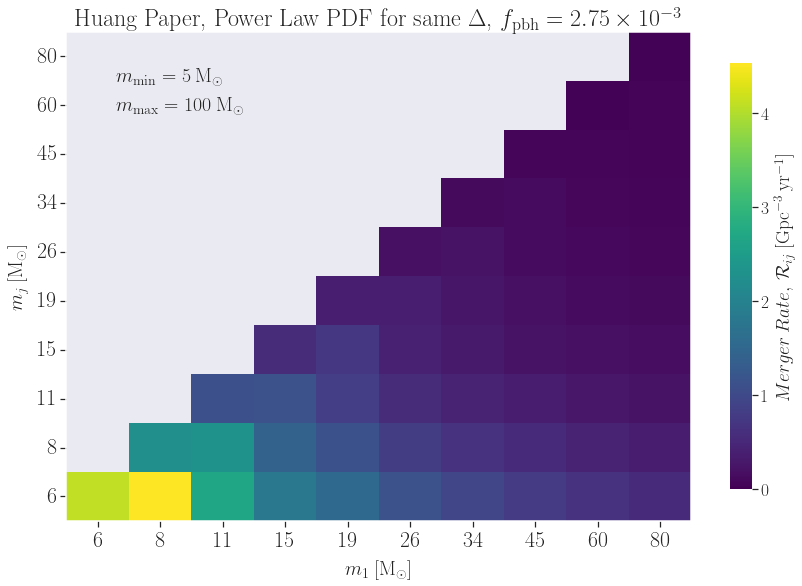

In [4]:
# Then, I tried to check what value of f_pbh correspond to a total merger rate
# R_12 = 100  Gpc⁻3 yr⁻1 .

# This is the plot of the merger rate as f_pbh = 2.75e-3 as calculated in the previous cell.


# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.



Merger_PWR = np.zeros((10, 10))

merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    merger = 0
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 2.75e-3
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 5       #in units of M☉
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR[i, j] = 0.5 * Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
        else:
            Merger_PWR[i, j] = Merger_equal_deltas(m_1, m_2,  t_m) * Δ_1 * Δ_2
        
        if m_1 > m_2:
            merger = merger + Merger_PWR[i,j]
        else:
            merger = 0
                
        merger_sum = merger_sum + merger

print("Total Merger rate =", merger_sum, 'Gpc^{-3} yr^{-1}')




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'




mask = np.tril(np.ones((10,10)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(14, 9))  


ax = sns.heatmap(Merger_PWR, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = { "shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)




ax.set_xticklabels(m_2_list, fontsize = 10)
ax.set_yticklabels(m_1_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

#ax.text(0.8, 9, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19)
#ax.text(0.8, 8.4, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.    
plt.title(r'Huang Paper, Power Law PDF for same $\Delta$,  $f_\mathrm{pbh} = 2.75 \times 10^{-3}$', fontsize = 24)
plt.savefig('Huang, Powerlaw PDF for same Δ.pdf')
plt.show()     

Total Merger rate = 212.91064581552493 Gpc^{-3} yr^{-1}


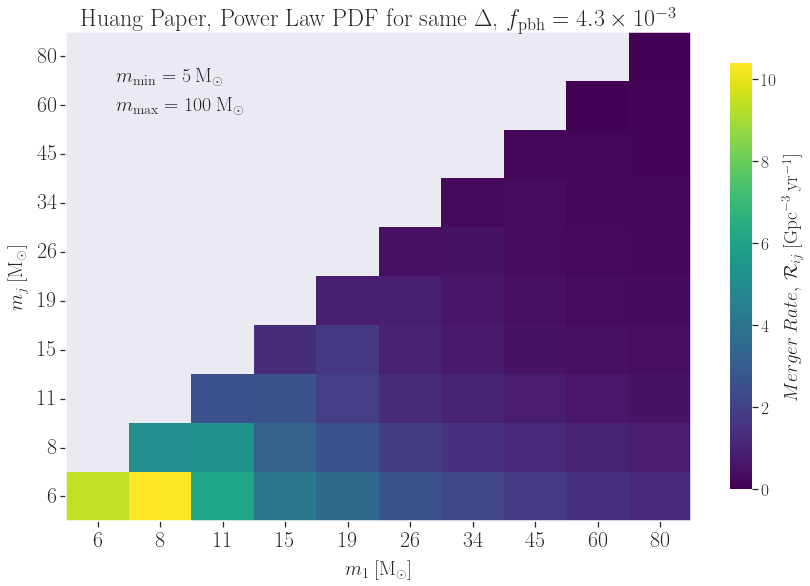

In [5]:
# Then, I tried to check the total value of the merger rate for f_pbh = 4.3e-3
# using Power Law as mentioned in Huang Paper.


# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.



Merger_PWR = np.zeros((10, 10))

merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    merger = 0
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 4.3e-3
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 5       #in units of M☉
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR[i, j] = 0.5 * Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
        else:
            Merger_PWR[i, j] = Merger_equal_deltas(m_1, m_2,  t_m) * Δ_1 * Δ_2
        
        if m_1 > m_2:
            merger = merger + Merger_PWR[i,j]
        else:
            merger = 0
                
        merger_sum = merger_sum + merger

print("Total Merger rate =", merger_sum, 'Gpc^{-3} yr^{-1}')




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'




mask = np.tril(np.ones((10,10)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(14, 9))  


ax = sns.heatmap(Merger_PWR, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = { "shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)




ax.set_xticklabels(m_2_list, fontsize = 10)
ax.set_yticklabels(m_1_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

#ax.text(0.8, 9, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19)
#ax.text(0.8, 8.4, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.    
plt.title(r'Huang Paper, Power Law PDF for same $\Delta$,  $f_\mathrm{pbh} = 4.3 \times 10^{-3}$', fontsize = 24)
plt.show()     

In [ ]:
# So, from the outcome of cell 4 and 5, it can be concluded that the value of 
# f_pbh = 4.3e-3 for Power Law PDF mentioned in Huang Paper corresponding to 
# R_12 = 100 Gpc⁻3 yr⁻1  actually corresponds to R_12 = 212 Gpc⁻3 yr⁻1. 

# And the value of f_pbh which actually roughly corresponds to R_12 = 100 Gpc⁻3 yr⁻1
# as per Huang merger rate calculations for same deltas is f_pbh = 2.75e-3.